In [1]:
# Check your system Tensorflow and Keras version
import tensorflow as tf; print('Tensorflow version is '+ tf.__version__)
import keras; print('Tensorflow Keras version is '+ keras.__version__)

Tensorflow version is 2.6.0
Tensorflow Keras version is 2.6.0


In [2]:
# Import necessary libraries
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Start to collect stock data (daily) by alpha_vantage library
ts = TimeSeries(key='PLEASE_ENTER_YOUR_OWN_KEY', output_format='pandas')
data, meta_data = ts.get_daily('MSFT', outputsize='full')

In [4]:
# Display header of stock dataframe
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-10-22,310.4000,311.09,307.80,309.16,17449332.0
2021-10-21,307.1702,311.02,306.36,310.76,16918100.0
2021-10-20,309.2100,309.70,306.11,307.41,16537069.0
2021-10-19,308.3480,309.30,307.22,308.23,17682139.0
2021-10-18,303.5700,308.21,302.69,307.29,22729297.0


In [5]:
# Check stock dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5531 entries, 2021-10-22 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5531 non-null   float64
 1   2. high    5531 non-null   float64
 2   3. low     5531 non-null   float64
 3   4. close   5531 non-null   float64
 4   5. volume  5531 non-null   float64
dtypes: float64(5)
memory usage: 259.3 KB


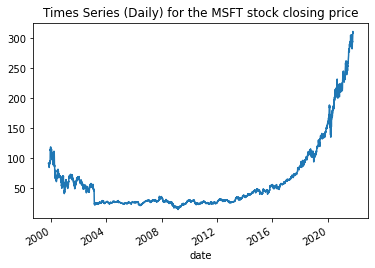

In [6]:
# Quick plot line graph with stock dataframe
data['4. close'].plot()
plt.title('Times Series (Daily) for the MSFT stock closing price')
plt.show()

In [7]:
# Save stock dataframe into csv file
data.to_csv(r'stock_data_msft.csv', index = True)

In [3]:
# Reload stock dataframe from csv file
data_from_csv = pd.read_csv('stock_data_msft.csv', index_col='date')

In [4]:
# Display header of stock dataframe, reload from csv
data_from_csv.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-10-22,310.4000,311.09,307.80,309.16,17449332.0
2021-10-21,307.1702,311.02,306.36,310.76,16918100.0
2021-10-20,309.2100,309.70,306.11,307.41,16537069.0
2021-10-19,308.3480,309.30,307.22,308.23,17682139.0
2021-10-18,303.5700,308.21,302.69,307.29,22729297.0


In [5]:
# Check stock dataframe information
data_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5531 entries, 2021-10-22 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5531 non-null   float64
 1   2. high    5531 non-null   float64
 2   3. low     5531 non-null   float64
 3   4. close   5531 non-null   float64
 4   5. volume  5531 non-null   float64
dtypes: float64(5)
memory usage: 259.3+ KB


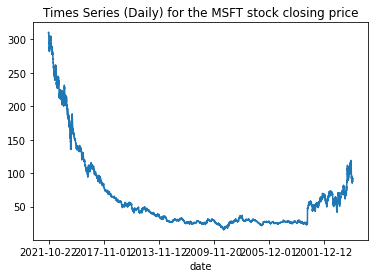

In [6]:
# Quick plot line graph with stock dataframe
data_from_csv['4. close'].plot()
plt.title('Times Series (Daily) for the MSFT stock closing price')
plt.show()

In [7]:
# Create new stock dataframe which only select past 3.5 years records (1278 days)
selected_data = data_from_csv[0:1278]

In [8]:
# Check new stock dataframe information
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 2021-10-22 to 2016-09-27
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1278 non-null   float64
 1   2. high    1278 non-null   float64
 2   3. low     1278 non-null   float64
 3   4. close   1278 non-null   float64
 4   5. volume  1278 non-null   float64
dtypes: float64(5)
memory usage: 59.9+ KB


In [9]:
# Display header of new stock dataframe, latest record is on 2021-10-22
selected_data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-10-22,310.4000,311.09,307.80,309.16,17449332.0
2021-10-21,307.1702,311.02,306.36,310.76,16918100.0
2021-10-20,309.2100,309.70,306.11,307.41,16537069.0
2021-10-19,308.3480,309.30,307.22,308.23,17682139.0
2021-10-18,303.5700,308.21,302.69,307.29,22729297.0


In [10]:
# Display footer of new stock dataframe, last record is on 2016-10-03
selected_data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2016-10-03,57.405,57.5500,57.060,57.42,19189515.0
2016-09-30,57.570,57.7700,57.340,57.60,29910788.0
2016-09-29,57.810,58.1679,57.210,57.40,25463536.0
2016-09-28,57.880,58.0600,57.670,58.03,20536400.0
2016-09-27,56.930,58.0600,56.681,57.95,28065071.0


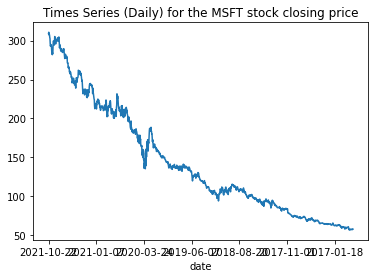

In [11]:
# Quick plot line graph with new stock dataframe, from 2021-10-22 to 2016-10-03
selected_data['4. close'].plot()
plt.title('Times Series (Daily) for the MSFT stock closing price')
plt.show()

In [12]:
# As we're going to forecast close price of stock, create new temporary dataframe and only
# select close price column.
df0=selected_data.reset_index()['4. close']

In [13]:
# Reset the records order from latest to oldest
df1=df0[::-1].reset_index(drop=True)

In [14]:
# Display header of close price dataframe, which order by oldest to latest
df1.head()

0    57.95
1    58.03
2    57.40
3    57.60
4    57.42
Name: 4. close, dtype: float64

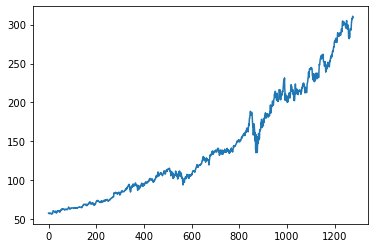

In [15]:
# Quick plot line graph with close price dataframe, from oldest 0 (2016-10-03) to 1278 (2021-10-22)
plt.plot(df1)

In [16]:
# Perform Mix-Max Scaling data normalization to scale it between 0 to 1, and transform it into array
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
# Check shape of close price array
print(df1.shape)

(1278, 1)


In [18]:
# Display header and footer of close price array
df1

array([[0.00405767],
       [0.00437283],
       [0.00189095],
       ...,
       [0.98680271],
       [1.        ],
       [0.99369682]])

In [19]:
# Perform data split for training and test, 65% of records for training, 35% of records for test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
# Check shape of training and test data array
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (830, 1)
test_data:  (448, 1)


In [21]:
# Define function to convert dataset array into matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
# Create training and test dataset matrix
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [23]:
# Check shape of training and test dataset matrix
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (729, 100)
y_train:  (729,)
X_test:  (347, 100)
y_test (347,)


In [24]:
# Convert training and test dataset 2D matrix into 3D matrix
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
# Check shape of training and test dataset matrix
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (729, 100, 1)
X_test:  (347, 100, 1)


In [26]:
# Import necessary libraries for LSTM model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
# Construct LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
# Print LSTM model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Start model training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 319ms/step - loss: 0.0108 - val_loss: 0.1069
Epoch 2/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0025 - val_loss: 0.0048
Epoch 3/100
12/12 [==============================] - 3s 247ms/step - loss: 5.8508e-04 - val_loss: 0.0015
Epoch 4/100
12/12 [==============================] - 3s 291ms/step - loss: 2.4466e-04 - val_loss: 0.0014
Epoch 5/100
12/12 [==============================] - 3s 231ms/step - loss: 1.6284e-04 - val_loss: 0.0029
Epoch 6/100
12/12 [==============================] - 3s 212ms/step - loss: 1.3557e-04 - val_loss: 0.0026
Epoch 7/100
12/12 [==============================] - 3s 252ms/step - loss: 1.3447e-04 - val_loss: 0.0020
Epoch 8/100
12/12 [==============================] - 4s 300ms/step - loss: 1.3048e-04 - val_loss: 0.0018
Epoch 9/100
12/12 [==============================] - 4s 365ms/step - loss: 1.3193e-04 - val_loss: 0.0018
Epoch 10/100
12/12 [==============================] - 4s 302ms/

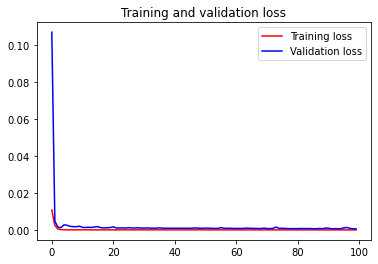

<Figure size 432x288 with 0 Axes>

In [33]:
# Check model training performance (loss)
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [34]:
model.save('stock_prediction_lstm_msft_model_v1.h5')

In [35]:
# Perform prediction to check model performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [36]:
# Convert normalized value back to origional form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
# Calculate Root Mean Square Error (RMSE) for training data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

107.21511696615312

In [38]:
# Calculate Root Mean Square Error (RMSE) for test data
math.sqrt(mean_squared_error(y_test,test_predict))

242.5068751473875

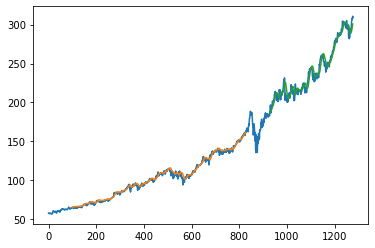

In [39]:
# Plot plot line graph with close price dataframe, together with train (orange) & predict (green) data line
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
# Check shape of test data array
test_data.shape

(448, 1)

In [41]:
# Select last 100 of records from test data and reshape it
x_input=test_data[348:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
# Covert array into list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
# Perform prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.97727454]
101
1 day input [0.76374882 0.77564608 0.77076111 0.77477939 0.78915853 0.79171919
 0.79959817 0.79357075 0.78971005 0.80357706 0.79778601 0.81039237
 0.8217381  0.82081232 0.8263867  0.81980775 0.83438386 0.8449417
 0.84297195 0.84572959 0.8695635  0.8696029  0.87854554 0.86865742
 0.87070596 0.86826347 0.882682   0.88870942 0.88287898 0.88177592
 0.86704223 0.87614245 0.88433659 0.90300977 0.91691617 0.91447368
 0.90458557 0.90332493 0.90442799 0.8981642  0.89780964 0.90687047
 0.90446738 0.91632524 0.91608887 0.91163725 0.90419162 0.90620076
 0.9174677  0.92944374 0.93633785 0.93034983 0.92109203 0.94488654
 0.97478727 0.97592972 0.96793256 0.96552947 0.95402616 0.95650804
 0.97175386 0.96501733 0.96482036 0.96214151 0.96210211 0.9583202
 0.95843839 0.9467775  0.94071068 0.94575323 0.9567838  0.97659943
 0.97817523 0.95709896 0.935156   0.93712575 0.95201702 0.95587772
 0.95505043 0.93464387 0.89268831 0.89457926 0.88638512 0.91467066
 0.89107312 0.91333123 0.93046801 0

8 day output [[0.99673593]]
9 day input [0.78971005 0.80357706 0.79778601 0.81039237 0.8217381  0.82081232
 0.8263867  0.81980775 0.83438386 0.8449417  0.84297195 0.84572959
 0.8695635  0.8696029  0.87854554 0.86865742 0.87070596 0.86826347
 0.882682   0.88870942 0.88287898 0.88177592 0.86704223 0.87614245
 0.88433659 0.90300977 0.91691617 0.91447368 0.90458557 0.90332493
 0.90442799 0.8981642  0.89780964 0.90687047 0.90446738 0.91632524
 0.91608887 0.91163725 0.90419162 0.90620076 0.9174677  0.92944374
 0.93633785 0.93034983 0.92109203 0.94488654 0.97478727 0.97592972
 0.96793256 0.96552947 0.95402616 0.95650804 0.97175386 0.96501733
 0.96482036 0.96214151 0.96210211 0.9583202  0.95843839 0.9467775
 0.94071068 0.94575323 0.9567838  0.97659943 0.97817523 0.95709896
 0.935156   0.93712575 0.95201702 0.95587772 0.95505043 0.93464387
 0.89268831 0.89457926 0.88638512 0.91467066 0.89107312 0.91333123
 0.93046801 0.93732272 0.93732272 0.93488024 0.92956193 0.94307438
 0.96844469 0.97419634 

18 day output [[1.0002337]]
19 day input [0.84297195 0.84572959 0.8695635  0.8696029  0.87854554 0.86865742
 0.87070596 0.86826347 0.882682   0.88870942 0.88287898 0.88177592
 0.86704223 0.87614245 0.88433659 0.90300977 0.91691617 0.91447368
 0.90458557 0.90332493 0.90442799 0.8981642  0.89780964 0.90687047
 0.90446738 0.91632524 0.91608887 0.91163725 0.90419162 0.90620076
 0.9174677  0.92944374 0.93633785 0.93034983 0.92109203 0.94488654
 0.97478727 0.97592972 0.96793256 0.96552947 0.95402616 0.95650804
 0.97175386 0.96501733 0.96482036 0.96214151 0.96210211 0.9583202
 0.95843839 0.9467775  0.94071068 0.94575323 0.9567838  0.97659943
 0.97817523 0.95709896 0.935156   0.93712575 0.95201702 0.95587772
 0.95505043 0.93464387 0.89268831 0.89457926 0.88638512 0.91467066
 0.89107312 0.91333123 0.93046801 0.93732272 0.93732272 0.93488024
 0.92956193 0.94307438 0.96844469 0.97419634 0.98632997 0.99003309
 0.98680271 1.         0.99369682 0.97727454 0.98334265 0.98773825
 0.99079418 0.99288207

26 day output [[1.0018207]]
27 day input [0.882682   0.88870942 0.88287898 0.88177592 0.86704223 0.87614245
 0.88433659 0.90300977 0.91691617 0.91447368 0.90458557 0.90332493
 0.90442799 0.8981642  0.89780964 0.90687047 0.90446738 0.91632524
 0.91608887 0.91163725 0.90419162 0.90620076 0.9174677  0.92944374
 0.93633785 0.93034983 0.92109203 0.94488654 0.97478727 0.97592972
 0.96793256 0.96552947 0.95402616 0.95650804 0.97175386 0.96501733
 0.96482036 0.96214151 0.96210211 0.9583202  0.95843839 0.9467775
 0.94071068 0.94575323 0.9567838  0.97659943 0.97817523 0.95709896
 0.935156   0.93712575 0.95201702 0.95587772 0.95505043 0.93464387
 0.89268831 0.89457926 0.88638512 0.91467066 0.89107312 0.91333123
 0.93046801 0.93732272 0.93732272 0.93488024 0.92956193 0.94307438
 0.96844469 0.97419634 0.98632997 0.99003309 0.98680271 1.
 0.99369682 0.97727454 0.98334265 0.98773825 0.99079418 0.99288207
 0.99431998 0.99534506 0.996117   0.99673593 0.99725991 0.99772131
 0.99813694 0.99851537 0.99886

In [44]:
# Generate numberic values for historical and prediction as x axis for plot
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
# Check shape of close price array
print(df1.shape)

(1278, 1)


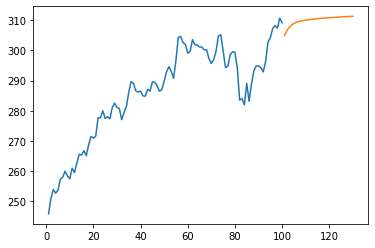

In [46]:
# Plot historical 100 days records with 30 days prediction records
plt.plot(day_new,scaler.inverse_transform(df1[1178:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

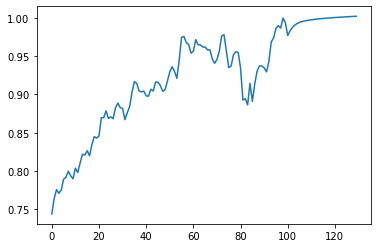

In [47]:
# Merge & plot historical and prediction records
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1178:])

In [48]:
# Convert normalized value back to origional form
df3=scaler.inverse_transform(df3).tolist()

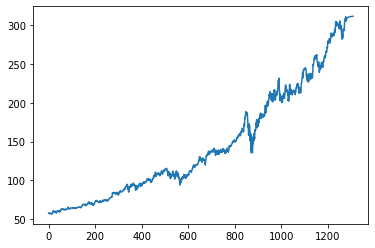

In [49]:
# Merge & plot full set of historical and prediction records
plt.plot(df3)

In [50]:
# Check number of records in final dataframe
len(df3)

1308

In [51]:
# Display last 30 days records which is coming out from prediction
from itertools import islice
res = list(islice(reversed(df3), 0, 30))
res.reverse()
print(res)

[[304.9913684940338], [306.5316976547241], [307.64747780799865], [308.4231951141357], [308.9531853914261], [309.3181825494766], [309.57838902950283], [309.7743382167816], [309.9314485836029], [310.0644567918777], [310.18157845497126], [310.287080245018], [310.3831408882141], [310.4711372184753], [310.55187112808227], [310.62631093978877], [310.6951526355743], [310.75928888797756], [310.8193097686767], [310.87610795021055], [310.9301222038269], [310.98204851150507], [311.03228025436397], [311.08115029335016], [311.1289007091522], [311.17580384254455], [311.2221622943878], [311.2679458045959], [311.3132451534271], [311.35824190139766]]
